In [1]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

unem_data = pf.get_series(series_id="T10Y2Y", api_key=api_key)

print(unem_data)

unem_info = pf.get_series_info(series_id="T10Y2Y", api_key=api_key)

      realtime_start realtime_end       date  value
0         2023-05-13   2023-05-13 1976-06-01   0.68
1         2023-05-13   2023-05-13 1976-06-02   0.71
2         2023-05-13   2023-05-13 1976-06-03   0.70
3         2023-05-13   2023-05-13 1976-06-04   0.77
4         2023-05-13   2023-05-13 1976-06-07   0.79
...              ...          ...        ...    ...
12244     2023-05-13   2023-05-13 2023-05-08  -0.48
12245     2023-05-13   2023-05-13 2023-05-09  -0.48
12246     2023-05-13   2023-05-13 2023-05-10  -0.47
12247     2023-05-13   2023-05-13 2023-05-11  -0.50
12248     2023-05-13   2023-05-13 2023-05-12  -0.52

[12249 rows x 4 columns]


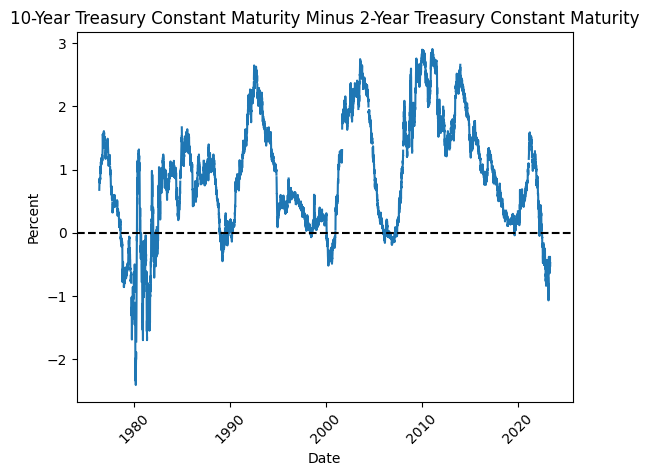

In [2]:
# Convert the "date" column to datetime format
unem_data['date'] = pd.to_datetime(unem_data['date'])

# Plot the graph
plt.plot(unem_data['date'], unem_data['value'])
plt.xlabel('Date')
plt.ylabel(unem_info.units)
plt.title(unem_info.title)
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

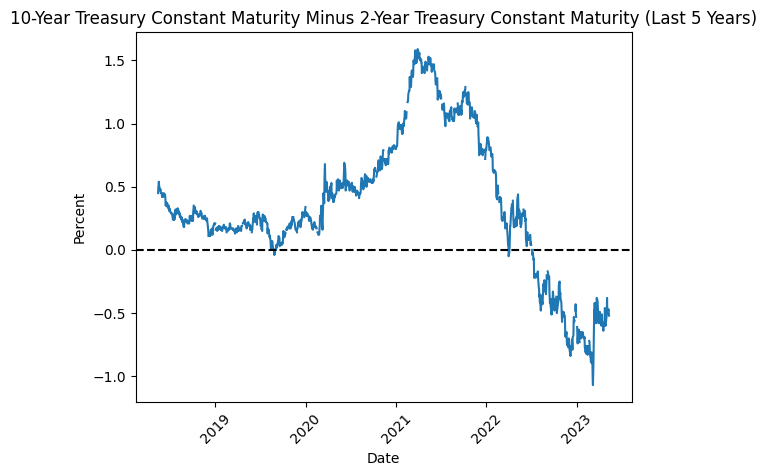

In [3]:
# Convert the "date" column to datetime format
unem_data['date'] = pd.to_datetime(unem_data['date'])

# Filter the DataFrame for the last 5 years
last_5_years_data = unem_data[unem_data['date'] >= unem_data['date'].max() - pd.DateOffset(years=5)]

# Plot the graph with data from the last 5 years
plt.plot(last_5_years_data['date'], last_5_years_data['value'])
plt.xlabel('Date')
plt.ylabel(unem_info.units)
plt.title(unem_info.title + ' (Last 5 Years)')
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

In [4]:
# Convert DataFrame to JSON
unem_json = unem_data.to_json(orient='records')

# Parse the JSON
data = json.loads(unem_json)

# Get the last item
last_item = data[-1]

print(str(unem_info.title) + ": " + str(last_item['value']) + "% | Last Updated: " + str(unem_info.last_updated))

10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity: -0.52% | Last Updated: 2023-05-12 16:01:02-05


In [5]:
print("Info: " + str(unem_info.id))
print("Title: " + str(unem_info.title))
print("Frequency: " + str(unem_info.frequency))
print("Units: " + str(unem_info.units))
print("Last Updated: " + str(unem_info.last_updated))
print("Popularity: " + str(unem_info.popularity))
print("Notes: " + str(unem_info.notes))

Info: T10Y2Y
Title: 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
Frequency: Daily
Units: Percent
Last Updated: 2023-05-12 16:01:02-05
Popularity: 100
Notes: Starting with the update on June 21, 2019, the Treasury bond data used in calculating interest rate spreads is obtained directly from the U.S. Treasury Department (https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield).
Series is calculated as the spread between 10-Year Treasury Constant Maturity (BC_10YEAR) and 2-Year Treasury Constant Maturity (BC_2YEAR). Both underlying series are published at the U.S. Treasury Department (https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield).
